In [131]:
# import
import pandas as pd
from collections import OrderedDict
from operator import itemgetter    
import re
from bs4 import BeautifulSoup

import numpy as np
import json
import glob
import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from pprint import pprint

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis

# This one is hanged from .gensim to gensim_models
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [132]:
df = pd.read_csv(r'../QBT/Empirical.csv', sep=',')
print(df.shape)


(21138, 23)


In [133]:
# Removing the "code" and "a" tag first, we want to delete what is inside the tag aswell, remvoing "a href" links and code snippets.

new_list = []
list_body = df["Body"].to_list()
temp = list_body

#print(list_body[2])
#print("-----")

for x in range(len(temp)):
    soup = BeautifulSoup(temp[x])
    codetags = soup.find_all(['code', 'a'])
    for codetag in codetags:
        codetag.extract()
        
    #print(soup)
    #print(str(soup))
    
    new_list.append(str(soup))

#print(len(new_list))
#print(new_list[2])
#print(df["Body"][1])

print("-----")
df["Body_new"] = new_list

#print(df["Body_new"][2])
print(df.shape)

-----
(21138, 24)


In [134]:
# Removing chacter and tags from the dataframe

# Removing the remaning tags
df["Body_new"] = df.Body_new.apply(lambda x: re.sub('<[^<]+?>', '', x))

# Removing ''
df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\'', '', x))

# Removing ""
df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\"', '', x))

df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\.', ' ', x))

df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\,', ' ', x))

df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\!', ' ', x))

df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\?', ' ', x))

df["Body_new"] = df.Body_new.apply(lambda x: re.sub('\\n', ' ', x))


print(df["Body_new"][1])

I have a node function that gets a link to YouTube video and sends a request to    Its a website that allows to download MP3 from YT  Then it parses the response HTML to get a direct download link from the document (using a library called cheerio  but if Youre not familiar with it  its just for scraping the link from HTML)  and afterwards opens the link to download the MP3  My code:  While working on my machine  this code works correctly  The console log gives a link which I can open on my browser and see that the mp3 is actually downloading  But when I run it on Lambda  the link I get has the correct format  but its simply not working  It redirects to some non-existing domain  Im not entirely sure how is this even possible  The only thing I might think about is that the website may think that the program is a bot (logically) and give a wrong link (which sounds pretty bizzare)  But I decided to also send some user-agent headers  It didnt work either  Im really confused about how can th

In [135]:
# Getting all posts with Empirical tags, this is beacuse our initial dataset contains posts with a "master"-tag of the set of tags

list_of_tages13 = ["<serverless>", "<faas>", "<serverless-framework>", "<aws-serverless>", "<openwhisk>", "<aws-lambda>", "<aws-sam>", "<aws-sam-cli>", 
"<serverless-architecture>", "<serverless-offline>", "<vercel>", "<serverless-plugins>", "<localstack>"]

What_we_want = df[df["Tags"].str.contains('|'.join(list_of_tages13))]
print(len(What_we_want))

df = What_we_want



20926


In [136]:
#  Code for creating dictonary that is counting the number of posts iwth the specific tag.
#What_we_want = What_we_want["Tags"].str.replace(r'<', '')
#What_we_want = What_we_want.str.replace(r'>', ' ')
#tags_list = What_we_want.tolist()

#list_of_tags = []
#for x in range(len(tags_list)):
#    list_of_tags.extend(tags_list[x].split())


#d = {i:list_of_tags.count(i) for i in list_of_tags}
#print(OrderedDict(sorted(d.items(), key = itemgetter(1), reverse = True)))

In [137]:
print(df.columns)
df["CommentCount"].mean()

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense', 'Body_new'],
      dtype='object')


1.5611201376278314

In [138]:
synonyms = [" cost"," pricing"," Fee "," Charge","Expensive", " Pay "," Payment"," bill " ," Cheap" ," Budget"]

count = 0
for word in synonyms:
    print("----" + str(word) + "----")
    print("Body count: " + str(len(df[df['Body_new'].str.contains(word, case=False)])))
    count= count + len(df[df['Body_new'].str.contains(word, case=False)])
print(count)

---- cost----
Body count: 277
---- pricing----
Body count: 30
---- Fee ----
Body count: 4
---- Charge----
Body count: 65
----Expensive----
Body count: 71
---- Pay ----
Body count: 44
---- Payment----
Body count: 33
---- bill ----
Body count: 15
---- Cheap----
Body count: 31
---- Budget----
Body count: 6
576


In [139]:
# filtering out the final dataset

#df_temp = pd.DataFrame()
columns = ["Body_new", "Body", "Id"]
df_filtered = df[df["Body_new"].str.contains('|'.join(synonyms), case=False)]
print(len(df_filtered))

# Exporting the final data set for analysis
print(len(df_filtered))
columns = ["Id", "Body_new"]
df_export = df_filtered[columns]
df_export = df_export.sample(frac=1).reset_index(drop=True)
#df_export.to_csv(r'../final_dataset_0429.csv', sep= ",", index = False)




499
499


In [140]:
print(df_filtered.columns)
columns = ["Body_new", "Body", "Id", "AnswerCount", "ViewCount", "AcceptedAnswerId", "CreationDate"]
df_filtered = df_filtered[columns]
df_filtered.head()

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'ParentId', 'CreationDate',
       'DeletionDate', 'Score', 'ViewCount', 'Body', 'OwnerUserId',
       'OwnerDisplayName', 'LastEditorUserId', 'LastEditorDisplayName',
       'LastEditDate', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense', 'Body_new'],
      dtype='object')


,Body_new,Body,Id,AnswerCount,ViewCount,AcceptedAnswerId,CreationDate
7,I am integrating a payment solution which uses...,<p>I am integrating a payment solution which u...,54114957,1,881,NaN,2019-01-09 16:55:31
42,I am using API Gateway to build a patch method...,<p>I am using API Gateway to build a patch met...,36036500,1,627,36161069.0,2016-03-16 13:02:51
63,I have an AWS Lambda function which triggers h...,<p>I have an AWS Lambda function which trigger...,54287228,1,696,NaN,2019-01-21 09:47:52
104,My current Situation: I currently have a Pytho...,<p><strong>My current Situation:</strong></p>\...,36298053,3,634,36300028.0,2016-03-30 01:28:16
123,i am new to aws serverless and trying to host...,"<p>i am new to aws serverless, and trying to h...",54473954,1,246,NaN,2019-02-01 06:21:53


In [141]:
df_analysis = pd.read_excel('categories.xlsx', index_col=0)


In [142]:
df_analysis["Category"].value_counts()
#df_analysis["Id"] = df_analysis["Id"].astype("int")
df_analysis["id"] = df_analysis.index.astype(int)
df_analysis = df_analysis.reset_index()
print(df_analysis.index)
#print(df_analysis.columns)
print(df_analysis.head())

print(df_filtered.index)
#print(df_filtered.columns)
print(df_filtered.head())


RangeIndex(start=0, stop=499, step=1)
           Id                                               Body  \
0  60856781.0  When triggering my Spring Boot application on ...   
1  55740175.0  What is the simplest and most cost effective w...   
2  58876798.0  Im doing a POC to find out how fast DynamoDB i...   
3  46168826.0  I am using the serverless framework with nodej...   
4  46154682.0  I am looking at serverless architecture to pro...   

                                 General Codes max 2  \
0  Lambda Error, Unsure,  avoid cost EC2 instance...   
1  Simple solution, Cost Effective solution, Trig...   
2  fast Dynamo DB, capacity on demand mode, AWS L...   
3  nodejs,  AWS lambda function, mysql, sequelize...   
4   gurantee executional isolation from cloud ser...   

                       Cost related Codes, Unlimited Category        id  
0  Cost Reduction by choosing spring boot instead...        A  60856781  
1                            Cost effective solution        B  55740

In [143]:
# Mergning the dfs
result = pd.merge(df_filtered, df_analysis, left_on="Id", right_on="id", how="outer")

In [144]:
result.shape

(499, 13)

In [145]:
result.columns

Index(['Body_new', 'Body_x', 'Id_x', 'AnswerCount', 'ViewCount',
       'AcceptedAnswerId', 'CreationDate', 'Id_y', 'Body_y',
       'General Codes max 2', 'Cost related Codes, Unlimited', 'Category',
       'id'],
      dtype='object')

In [146]:
# Creating new year column
result['CreationDate'] = pd.to_datetime(result['CreationDate'])
result['Year'] = pd.DatetimeIndex(result['CreationDate']).year
print(result["CreationDate"][1])
print(result["Year"][1])

# Create new AcceptedAnswerId column

print(result["AcceptedAnswerId"])
result["AcceptedAnswerId"] =  result["AcceptedAnswerId"].fillna(0)
result["AcceptedAnswerId"] =  result["AcceptedAnswerId"].astype("int64")
result["AcceptedAnswerId"].where(result["AcceptedAnswerId"] <=1, 1, inplace=True)
print(result["AcceptedAnswerId"])

2016-03-16 13:02:51
2016
0             NaN
1      36161069.0
2             NaN
3      36300028.0
4             NaN
          ...    
494           NaN
495           NaN
496           NaN
497    67303546.0
498           NaN
Name: AcceptedAnswerId, Length: 499, dtype: float64
0      0
1      1
2      0
3      1
4      0
      ..
494    0
495    0
496    0
497    1
498    0
Name: AcceptedAnswerId, Length: 499, dtype: int64


In [149]:
# Checking if categories are missing in any of the rows, this should result in 0
print(result["Category"].isna().sum())

480


In [150]:
# creating dummy df to test code
result_temp = result.copy()
result_temp.dropna(subset = ["Category"], inplace=True)

# Create new dataframes for each category
list_of_dfs = []
cat = result_temp["Category"].unique()

frames = {}
for x in cat:
    frames[x] = result_temp[result_temp["Category"] == x]

for x in cat:
    print(frames[x].shape)

(4, 14)
(9, 14)
(3, 14)
(2, 14)
(1, 14)


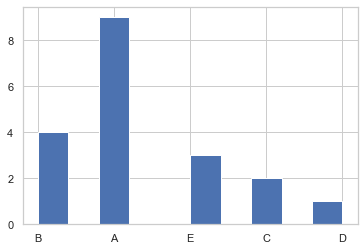

<AxesSubplot:xlabel='Category', ylabel='count'>

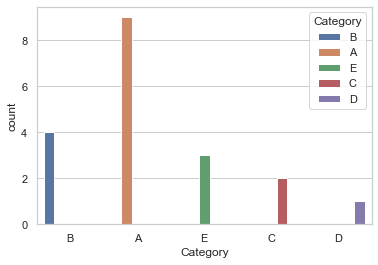

In [152]:
#sns.relplot(data=result_temp, x="Year", y = "Category", hue = "Category")

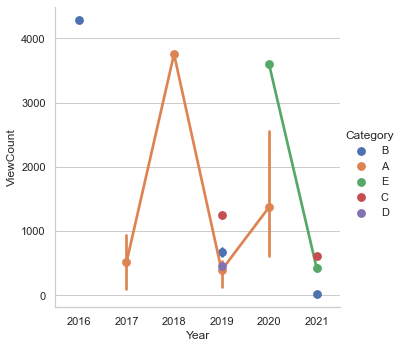

In [154]:
# Line plot for all categories
sns.catplot(x="Year", y="ViewCount", hue="Category", kind="point", data=result_temp)


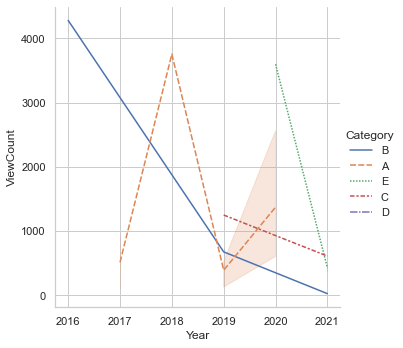

In [157]:
#  ViewCount for all categories category X
sns.relplot(data=result_temp, y="ViewCount", x = "Year", style= "Category", hue = "Category", kind="line")

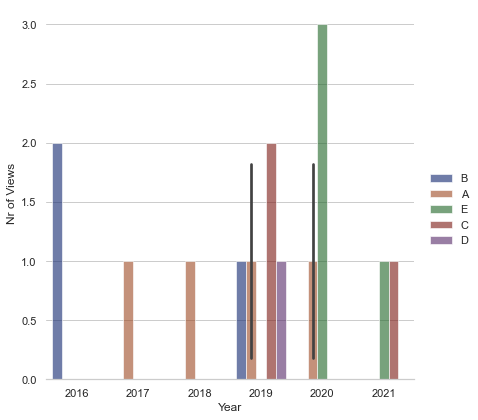

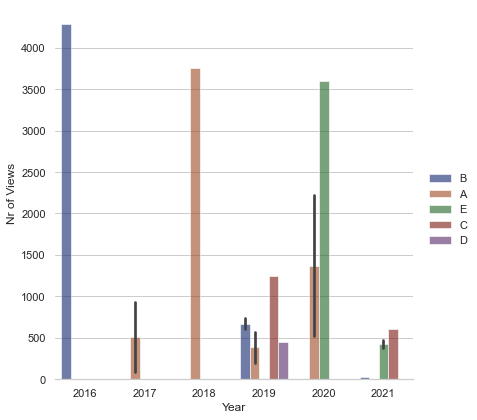

In [61]:
sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=result_temp, kind="bar",
    x="Year", y="ViewCount", hue="Category",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Year", "Nr of Views")
g.legend.set_title("")

(5,)
Category
A    1.000000
B    1.000000
C    1.500000
D    1.000000
E    1.666667
Name: AnswerCount, dtype: float64


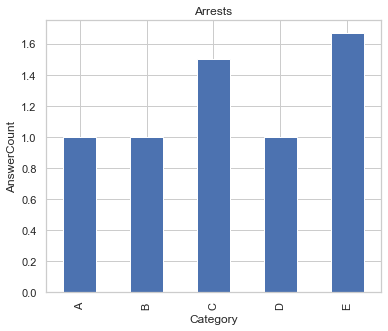